# Projet Apprentissage Statistique : Sujet 5

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import, traitement, et description des données

In [2]:
#On utilise le dataset présent dans sklearn
from sklearn.datasets import load_breast_cancer

In [99]:
#Import des données
#Dans ce projet, on nommera data l'object contenant les données
data = load_breast_cancer()

#La data set est commposé d'un échantillon de 569 :
print("La taille du dataset est :", data.data.shape, end='\n\n')

#Description des données
#Les variables :
print("Nombre de features :  ", data.feature_names.size) #Il y a 30 variables différentes
print("Les features sont : ", data.feature_names, end='\n\n' ) #Représentent les variables de notre modèle

#Les targets :
#Nous sommes dans un problème de classification. Les sorties sont au nombre de 2
print("Nombre de targets :  ", data.target_names.size)
print("Les features sont : ", data.target_names ) 
#L'information de sortie est : le cancer est-il malignant ou benin 

#Pour la suite, on sépare les variables de données
X, y = data.data, data.target

La taille du dataset est : (569, 30)

Nombre de features :   30
Les features sont :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Nombre de targets :   2
Les features sont :  ['malignant' 'benign']


### Séparation des données en training set et testing set

In [4]:
from sklearn.model_selection import train_test_split

#Séparation du dataset en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#La répartition est de 33% pour le test et 67% pour l'entrainement
print("Données d'entrainement : ", X_train.shape)
print("Données de test : ", X_test.shape)
print("Sorties d'entrainement : ", y_train.shape)
print("Sorties de test : ", y_test.shape)


Données d'entrainement :  (381, 30)
Données de test :  (188, 30)
Sorties d'entrainement :  (381,)
Sorties de test :  (188,)


## Arbres de décisions

### Librairie sklearn pour les trees (exemple)

array([1])

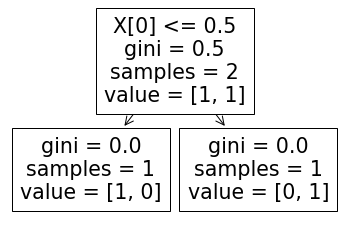

In [5]:
from sklearn import tree
#Copié collé de la page de présentation de la librairie
X_ex = [[0, 0], [1, 1]]
Y_ex = [0, 1]
clf_ex = tree.DecisionTreeClassifier()
clf_ex = clf_ex.fit(X_ex, Y_ex)
tree.plot_tree(clf_ex)

clf_ex.predict([[2., 2.]])

### Arbre de décision pour notre dataset

In [6]:
#Création de l'arbre de décision
arbre_decision = tree.DecisionTreeClassifier()

#Entrainement sur le training dataset
arbre_decision = arbre_decision.fit(X_train, y_train)

### Test du modèle sur le testing dataset

In [7]:
#Prédiction du modèle pour le testing dataset
print("Sorties prédites par le modèle : ", arbre_decision.predict(X_test), end='\n\n')

#Vrais résultats du testing dataset
print("Vraies données du dataset : ", y_test, end='\n\n')

#Calcul du score
print("Score du modèle sur le dataset de test : ", arbre_decision.score(X_test, y_test))

Sorties prédites par le modèle :  [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 1]

Vraies données du dataset :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]

Score du modèle sur le dataset de test :  0.8882978723404256


## Forêts aléatoires

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Création de la forêt aléatoire
forest = RandomForestClassifier()

#Entrainement sur le training dataset
forest.fit(X_train ,y_train)

RandomForestClassifier()

### Test du modèle sur le testing dataset

In [10]:
#Prédiction du modèle pour le testing dataset
print("Sorties prédites par le modèle : ", forest.predict(X_test), end='\n\n')

#Vrais résultats du testing dataset
print("Vraies données du dataset : ", y_test, end='\n\n')

#Calcul du score
print("Score du modèle sur le dataset de test : ", forest.score(X_test, y_test))

Sorties prédites par le modèle :  [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]

Vraies données du dataset :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]

Score du modèle sur le dataset de test :  0.9680851063829787


## Partie Boosting

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
#Création de la forêt aléatoire
boosting = AdaBoostClassifier(n_estimators=100)

#Entrainement sur le training dataset
boosting.fit(X_train ,y_train)

AdaBoostClassifier(n_estimators=100)

### Test du modèle sur le testing dataset

In [13]:
#Prédiction du modèle pour le testing dataset
print("Sorties prédites par le modèle : ", boosting.predict(X_test), end='\n\n')

#Vrais résultats du testing dataset
print("Vraies données du dataset : ", y_test, end='\n\n')

#Calcul du score
print("Score du modèle sur le dataset de test : ", boosting.score(X_test, y_test))


Sorties prédites par le modèle :  [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1]

Vraies données du dataset :  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]

Score du modèle sur le dataset de test :  0.9574468085106383


## Matrice de confusion

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, arbre_decision.predict(X_test))*100} %")

Le pourcentage de bien classés est de : 88.82978723404256 %


In [16]:
#Attention il y a peut-être une erreur dans l'étiquetage de la matrice
arbre_decision_matrix_confusion = pd.DataFrame(confusion_matrix(y_test, arbre_decision.predict(X_test)),
             index = ["Malignants Donnés", "Bénins données"],
             columns = ["Malins Prédits", "Bénins Prédits"])

In [17]:
arbre_decision_matrix_confusion

,Malins Prédits,Bénins Prédits
Malignants Donnés,60,7
Bénins données,14,107


## Interprétation des features

### Pour l'arbre de décision

In [18]:
arbre_decision_interpretation = pd.DataFrame(arbre_decision.feature_importances_, 
                                             index = data.feature_names, 
                                             columns = ["importance"]).sort_values("importance", ascending = False)

In [19]:
arbre_decision_interpretation

,importance
mean concave points,0.723194
worst perimeter,0.056358
worst concavity,0.053507
worst radius,0.033358
mean texture,0.021283
worst smoothness,0.021083
worst texture,0.018194
radius error,0.014038
fractal dimension error,0.010883
smoothness error,0.010052


### Pour les forêts aléatoires

In [20]:
forest_interpretation = pd.DataFrame(forest.feature_importances_, 
                                             index = data.feature_names, 
                                             columns = ["importance"]).sort_values("importance", ascending = False)

In [21]:
forest_interpretation

,importance
mean concave points,0.157826
worst perimeter,0.123986
worst radius,0.089358
worst concave points,0.083494
worst area,0.083354
mean concavity,0.080141
worst concavity,0.052420
mean perimeter,0.049532
mean area,0.044062
area error,0.033587


### Pour le boosting

In [22]:
boosting_interpretation = pd.DataFrame(boosting.feature_importances_, index = data.feature_names, columns = ["importance"]).sort_values("importance", ascending = False)

In [23]:
boosting_interpretation

,importance
worst area,0.08
worst concavity,0.08
mean texture,0.07
worst symmetry,0.06
mean compactness,0.06
mean concave points,0.06
worst concave points,0.05
worst texture,0.05
fractal dimension error,0.05
area error,0.05


### Modèle K-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
Classifier = KNeighborsClassifier()

In [27]:
Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
Classifier.score(X_test, y_test)

0.9521276595744681

### Modèle Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [32]:
RegLog = LogisticRegression()

In [33]:
RegLog.fit(X_train, y_train)

/Users/thibaultgaillard/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
RegLog.score(X_test, y_test)

0.9680851063829787

In [38]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [42]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [45]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [100]:
import pandas as pd

In [101]:
data_pd =  pd.DataFrame(data.data, columns = data.feature_names)

In [102]:
data_pd['target'] = y

In [103]:
data_pd

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [104]:
print(data.target_names)

['malignant' 'benign']


In [105]:
print(y.mean())

0.6274165202108963


In [106]:
df_benin = data_pd[data_pd['target']== 1]
df_malignant = data_pd[data_pd['target']== 0]

AttributeError: 'Line2D' object has no property 'bins'

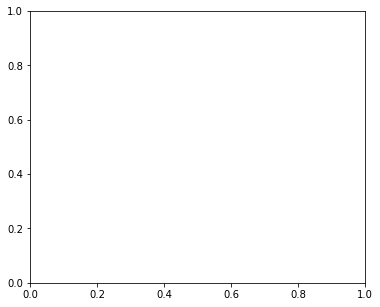

In [111]:
for param in data.feature_names :
    liste = []
    #print(df_benin[param].mean())
    #print(df_malignant[param].mean())
    liste.append(df_benin[param].mean())
    liste.append(df_malignant[param].mean())
    plt.figure(figsize=(6,5))
    plt.plot(liste,bins=20,range=(45,55),align="mid",rwidth=0.9,color="b",edgecolor="red",label="éprouvette")
    #plt.hist(liste,bins=20,range=(45,55),align="mid",rwidth=0.9,color="b",edgecolor="red",label="éprouvette")
    #plt.title("Volume d'eau contenu par une éprouvette graduée pour 50mL mesuré")
    #plt.xlabel("Volume (mL)")
    #plt.ylabel("Fréquence")
    #plt.legend()
    #plt.show()
    

In [90]:
df_test = pd.DataFrame(data.target)

In [91]:
df_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [92]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [94]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 